# Stochastic Model - Geometric Brownian Motion (GBM)

In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt

/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_87982/2274562957.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Load cryptocurrency data
cryptos = ['BTC-USD', 'ETH-USD', 'SOL-USD', 'BNB-USD', 'XRP-USD', 'TON-USD', 'DOGE-USD', 'ADA-USD', 'SHIB-USD', 'AVAX-USD']
start_date = '2021-01-01'
end_date = '2024-01-01'

crypto_data = yf.download(cryptos, start=start_date, end=end_date)['Adj Close']


[*********************100%%**********************]  10 of 10 completed


## GBM Model Implementation

### GBM Parameters

In [3]:
# Define GBM parameters
mu = crypto_data.pct_change().mean()  # Drift (average return)
sigma = crypto_data.pct_change().std()  # Volatility (standard deviation of returns)
T = len(crypto_data)  # Time horizon
N = 1000  # Number of simulations
dt = 1  # Time step


/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_87982/482418939.py:2: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  mu = crypto_data.pct_change().mean()  # Drift (average return)
/var/folders/sd/j5p08m515kd7n9549lkkz_q40000gn/T/ipykernel_87982/482418939.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  sigma = crypto_data.pct_change().std()  # Volatility (standard deviation of returns)
/Users/ephraim888sun/.pyenv/versions/3.9.6/lib/python3.9/site-packages/pandas/core/nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) **

In [4]:
# Implement GBM Model
price_paths_list = []

for i in range(N):
    price_paths_crypto = pd.DataFrame()  # Initialize DataFrame for each iteration
    for crypto in cryptos:
        price_path = []  # Initialize price_path for each cryptocurrency
        S = crypto_data[crypto].iloc[-1]  # Initial price
        for t in range(1, T + 1):
            S = S * np.exp((mu[crypto] - 0.5 * sigma[crypto] ** 2) * dt + sigma[crypto] * np.sqrt(dt) * np.random.normal())
            price_path.append(S)
        price_paths_crypto[f'{crypto} {i}'] = price_path
    price_paths_list.append(price_paths_crypto)

# Concatenate all DataFrames
price_paths = pd.concat(price_paths_list, axis=1)


## Visualize Results

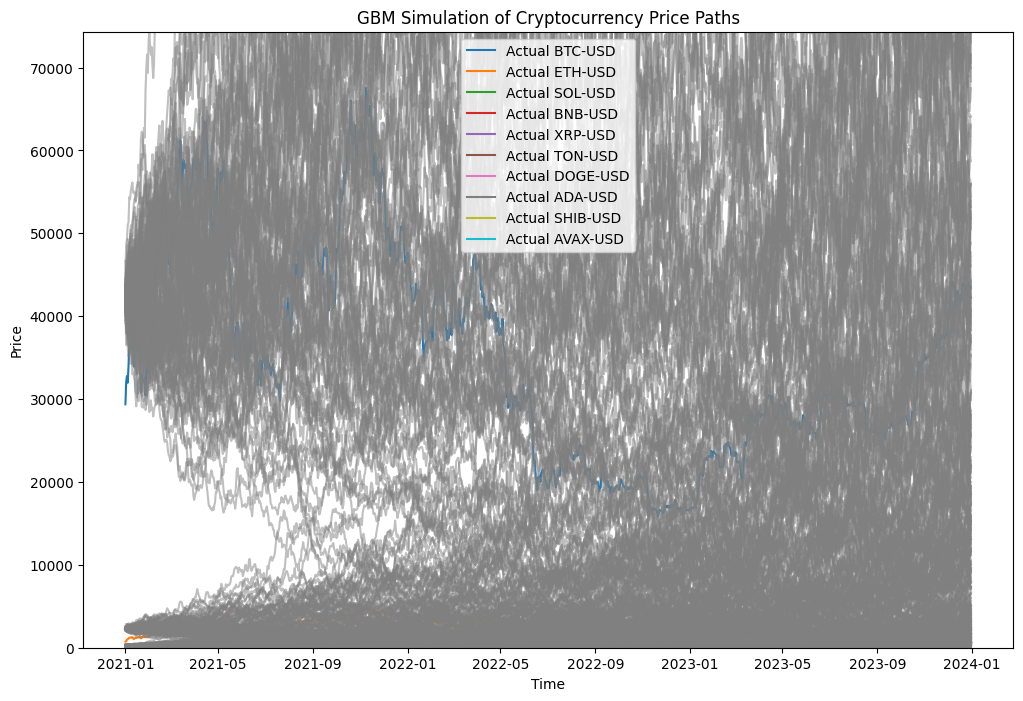

In [5]:
# Get the minimum and maximum values of actual cryptocurrency prices
min_price = crypto_data.min().min()
max_price = crypto_data.max().max()

# Visualize Actual Price Data and Simulated Price Paths
plt.figure(figsize=(12, 8))
for crypto in cryptos:
    plt.plot(crypto_data.index, crypto_data[crypto], label=f'Actual {crypto}')

# Plot Simulated Price Paths
for i in range(N):
    plt.plot(crypto_data.index, price_paths.iloc[:, i], color='gray', alpha=0.5)

# Set y-axis limits to focus on the relevant price range
plt.ylim(min_price * 0.9, max_price * 1.1)

plt.title('GBM Simulation of Cryptocurrency Price Paths')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


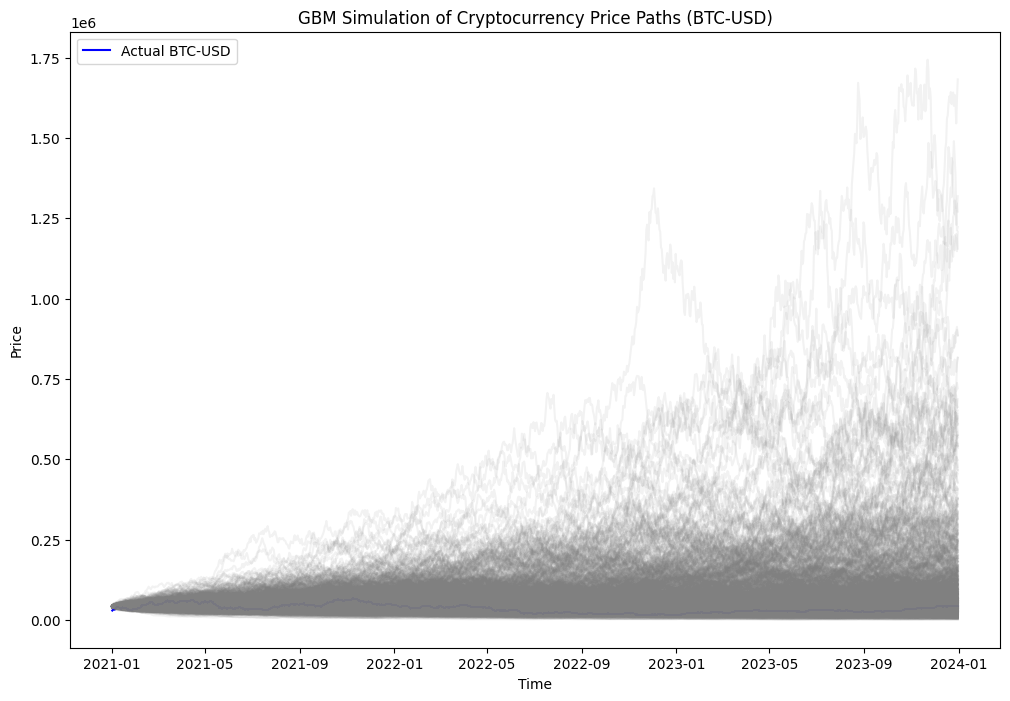

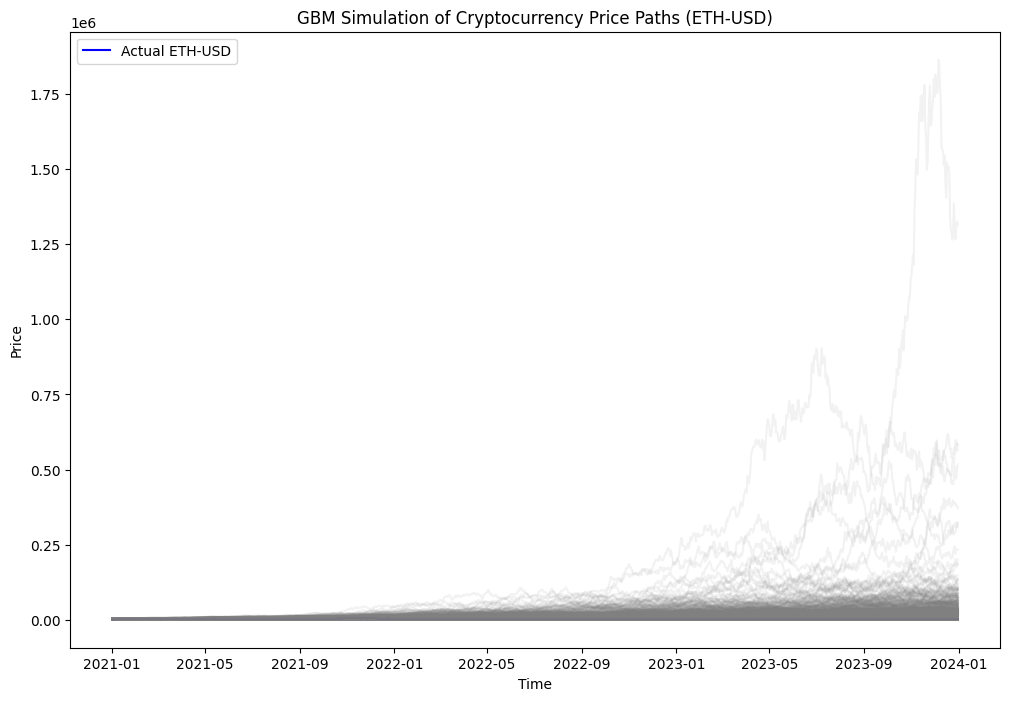

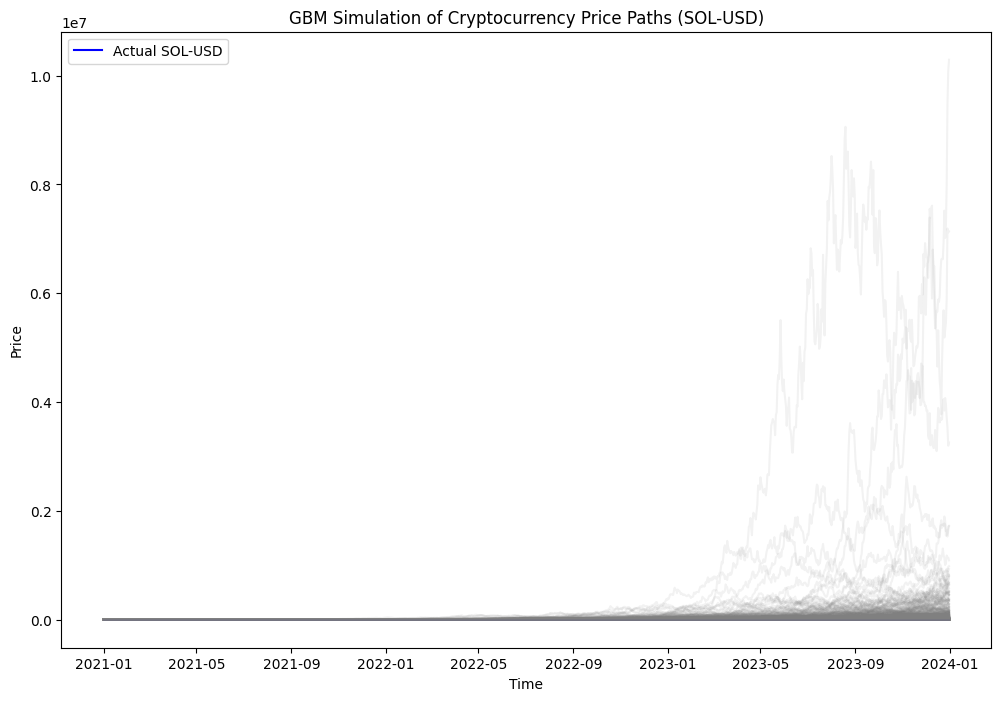

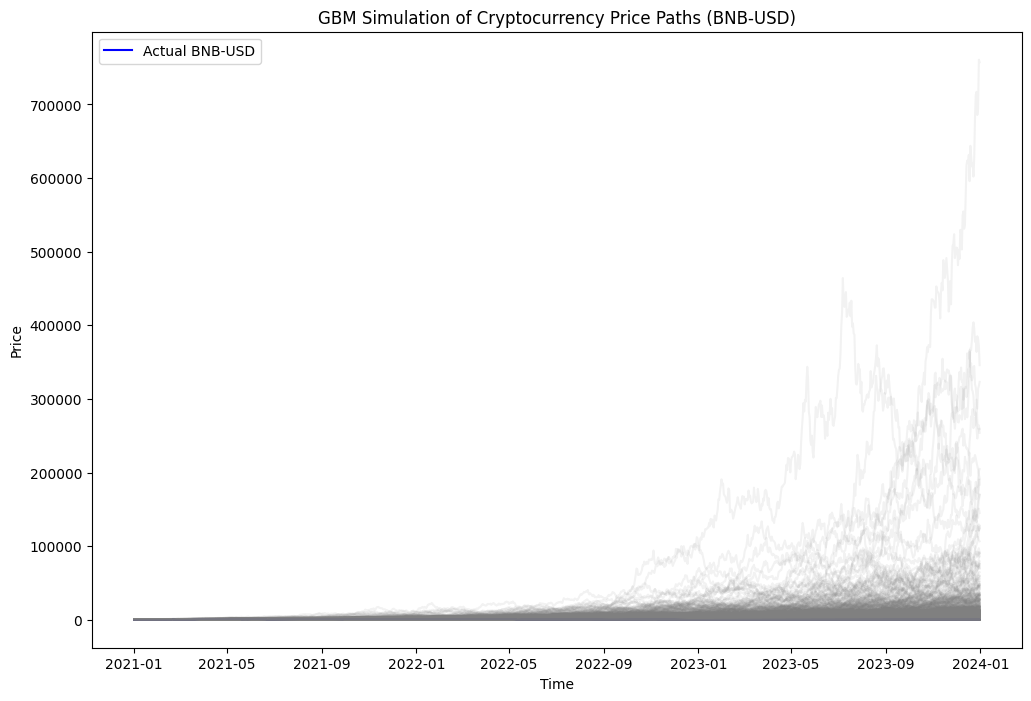

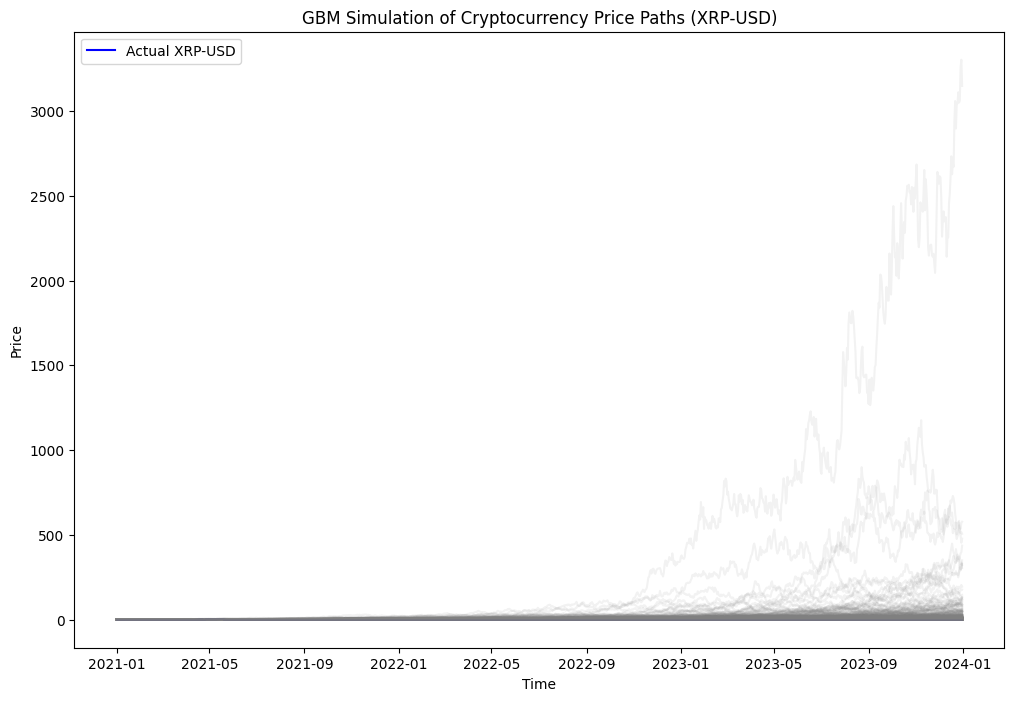

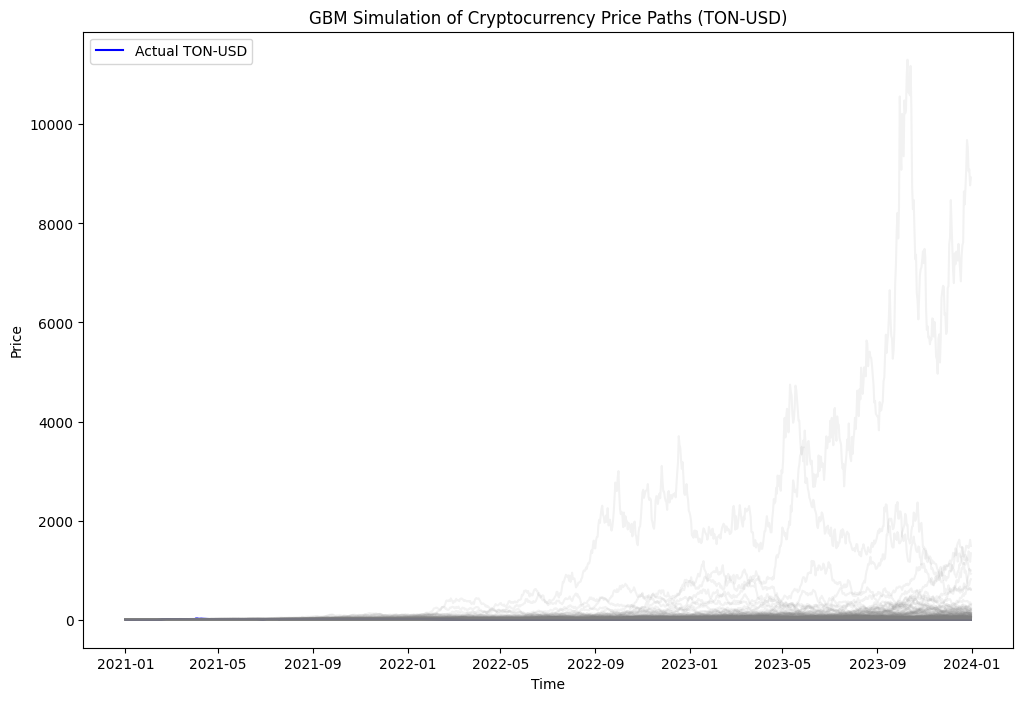

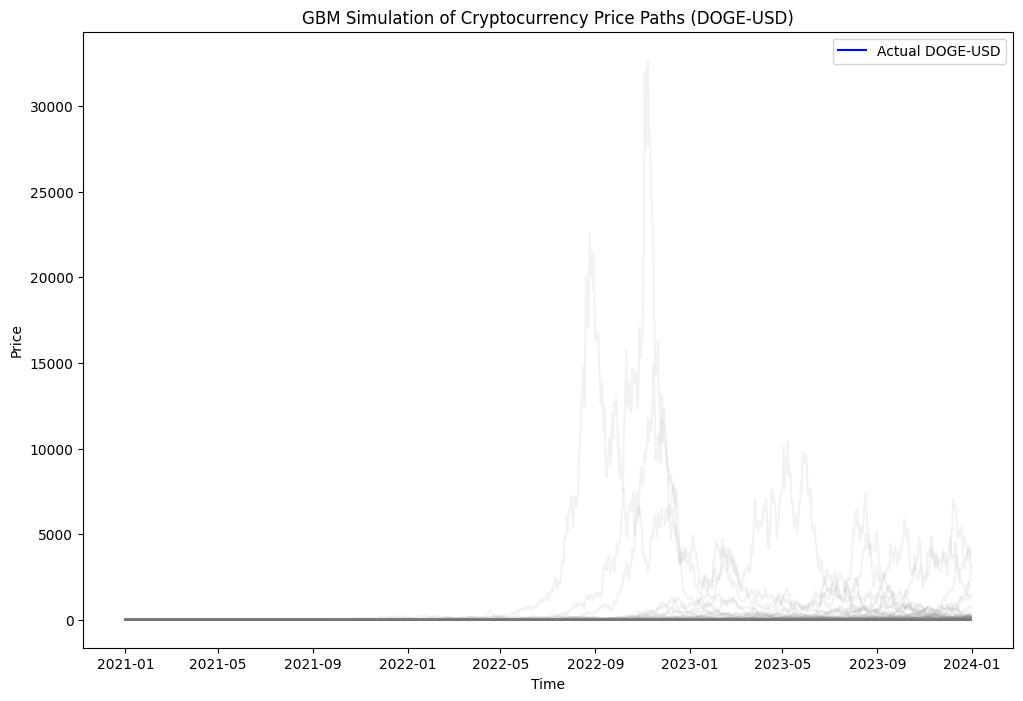

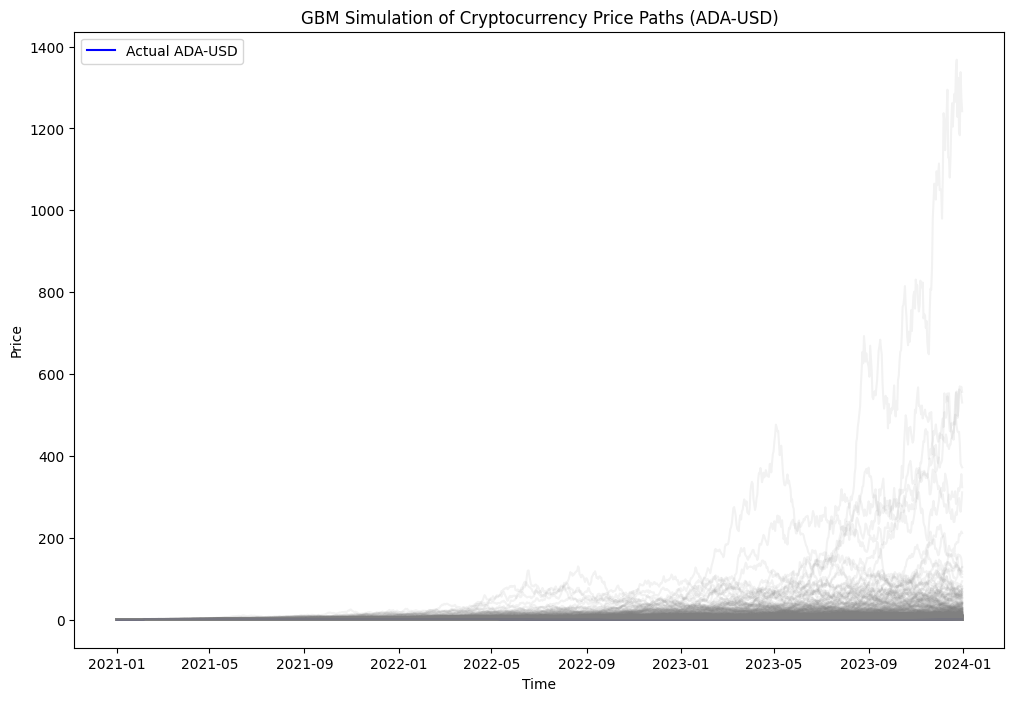

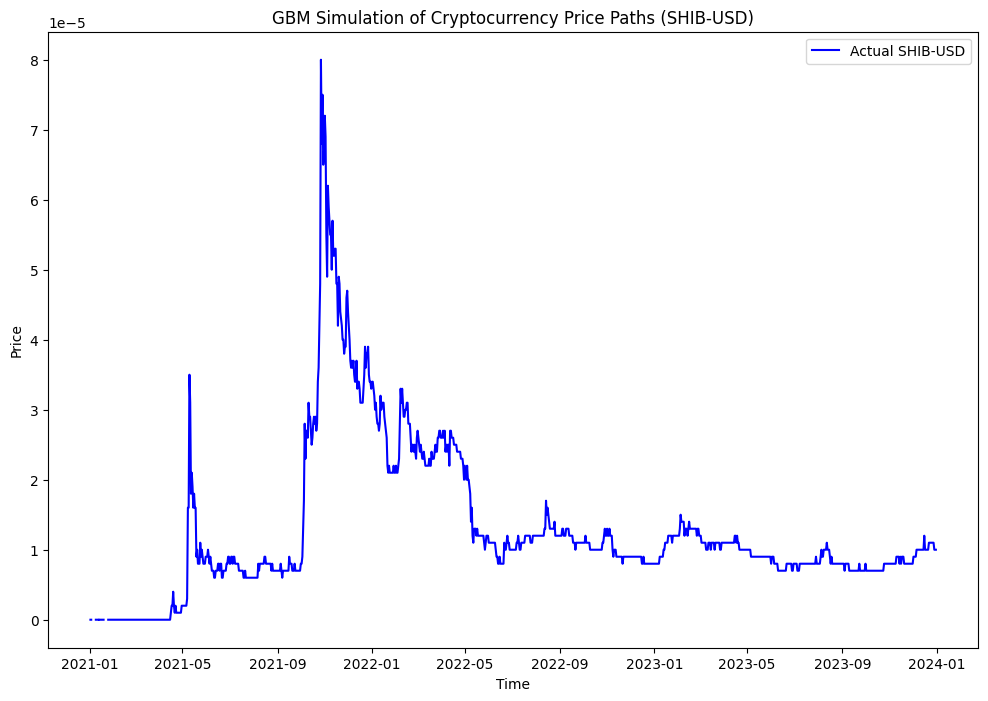

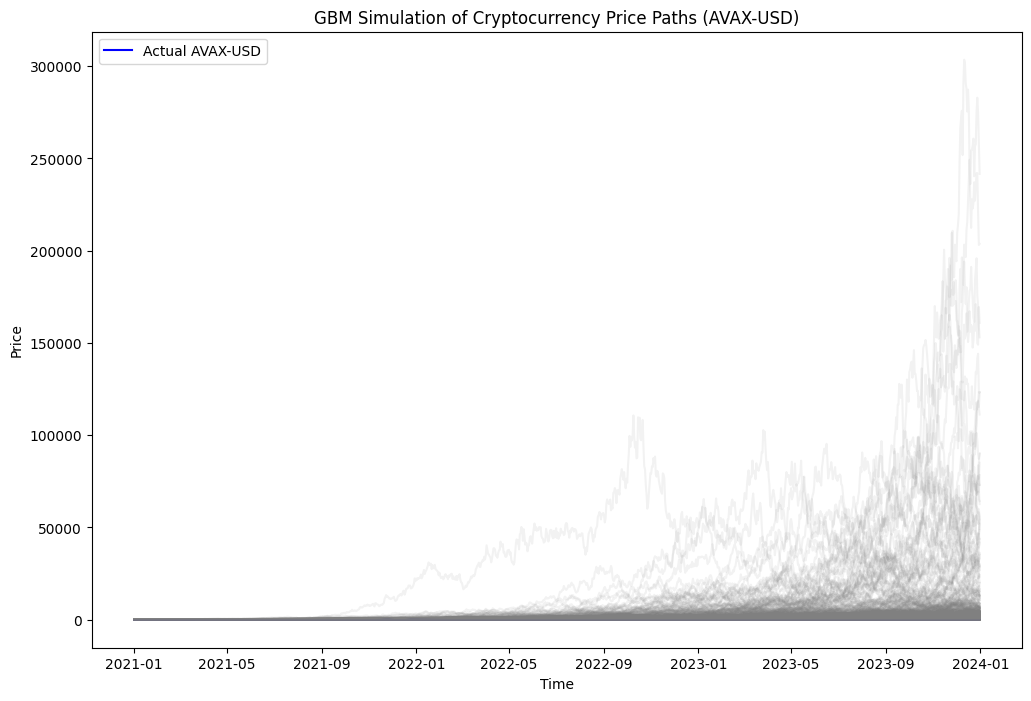

In [6]:
# Visualize Actual Price Data and Simulated Price Paths for each cryptocurrency
for crypto in cryptos:
    plt.figure(figsize=(12, 8))
    plt.plot(crypto_data.index, crypto_data[crypto], label=f'Actual {crypto}', color='blue')
    for i in range(N):
        plt.plot(crypto_data.index, price_paths[crypto + f' {i}'], color='gray', alpha=0.1)

    plt.title(f'GBM Simulation of Cryptocurrency Price Paths ({crypto})')
    plt.xlabel('Time')
    plt.ylabel('Price')
    plt.legend()
    plt.show()


## Metrics and Comparison

In [7]:
# Calculate Metrics
metrics = pd.DataFrame(index=cryptos, columns=['Mean', 'Standard Deviation', 'Maximum Drawdown'])

for crypto in cryptos:
    # Mean
    mean = crypto_data[crypto].mean()
    
    # Standard Deviation
    std_dev = crypto_data[crypto].std()
    
    # Maximum Drawdown
    max_drawdown = (crypto_data[crypto] / crypto_data[crypto].cummax() - 1).min()
    
    # Assign values to DataFrame
    metrics.loc[crypto] = [mean, std_dev, max_drawdown]

# Display Metrics
print("Metrics for Cryptocurrencies:")
print(metrics)


Metrics for Cryptocurrencies:
                  Mean Standard Deviation Maximum Drawdown
BTC-USD   34831.378123       12556.081916        -0.766346
ETH-USD    2186.967729         863.545155        -0.793512
SOL-USD      55.782474          55.221616        -0.962725
BNB-USD     323.091985         117.789668         -0.70838
XRP-USD       0.631261           0.287855         -0.83249
TON-USD        3.99546           3.533988        -0.959008
DOGE-USD      0.125877           0.094779        -0.922585
ADA-USD       0.829737           0.632222        -0.918513
SHIB-USD      0.000013           0.000011          -0.9125
AVAX-USD     32.960283          28.309159        -0.934679


## Conclusion

In [8]:
# Summarize findings and discuss implications of the results.
